# More Titanic? More Titanic.

![titanic picture from wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/600px-RMS_Titanic_3.jpg)

In [2]:
# first, need our imports and to grab the data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn


In [3]:
# Let's look and remember what's in the data
df = pd.read_csv('data/titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### What are the most common last names?

Wait, the last names are part of the full name column... first we'll need to grab the last names!

A few ways we can do this:

In [5]:
# Need to grab last names ... but how?
df['Name']
#want name leading to comma

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [9]:
df['Name'].str.split(', ')[0][0]

'Braund'

In [11]:
df['Name'].str.split(', ').map(lambda x: x[0])

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [13]:
last_name_series = []
for row in df.index:
    last_name = df['Name'].str.split(', ')[row][0]
    last_name_series.append(last_name)

last_name_series

['Braund',
 'Cumings',
 'Heikkinen',
 'Futrelle',
 'Allen',
 'Moran',
 'McCarthy',
 'Palsson',
 'Johnson',
 'Nasser',
 'Sandstrom',
 'Bonnell',
 'Saundercock',
 'Andersson',
 'Vestrom',
 'Hewlett',
 'Rice',
 'Williams',
 'Vander Planke',
 'Masselmani',
 'Fynney',
 'Beesley',
 'McGowan',
 'Sloper',
 'Palsson',
 'Asplund',
 'Emir',
 'Fortune',
 "O'Dwyer",
 'Todoroff',
 'Uruchurtu',
 'Spencer',
 'Glynn',
 'Wheadon',
 'Meyer',
 'Holverson',
 'Mamee',
 'Cann',
 'Vander Planke',
 'Nicola-Yarred',
 'Ahlin',
 'Turpin',
 'Kraeff',
 'Laroche',
 'Devaney',
 'Rogers',
 'Lennon',
 "O'Driscoll",
 'Samaan',
 'Arnold-Franchi',
 'Panula',
 'Nosworthy',
 'Harper',
 'Faunthorpe',
 'Ostby',
 'Woolner',
 'Rugg',
 'Novel',
 'West',
 'Goodwin',
 'Sirayanian',
 'Icard',
 'Harris',
 'Skoog',
 'Stewart',
 'Moubarek',
 'Nye',
 'Crease',
 'Andersson',
 'Kink',
 'Jenkin',
 'Goodwin',
 'Hood',
 'Chronopoulos',
 'Bing',
 'Moen',
 'Staneff',
 'Moutal',
 'Caldwell',
 'Dowdell',
 'Waelens',
 'Sheerlinck',
 'McDermott',

In [19]:
df['Last Name'] = pd.Series(name[0] for name in df['Name'].str.split(', '))
# everything after series is the generator object
# a generator object is something that it can go through and do
# hasnt unpacked and doesnt know how you want it yet
#

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [30]:
#most common last name
df[['PassengerId','Last Name']].groupby(by = 'Last Name').count().sort_values(by='PassengerId',ascending = False)
#aagregates other column by what ive put

,PassengerId
Last Name,
Andersson,9
Sage,7
Skoog,6
Carter,6
Goodwin,6
...,...
Henry,1
Hewlett,1
Hirvonen,1


In [27]:
df['Last Name'].value_counts()

Andersson    9
Sage         7
Carter       6
Panula       6
Skoog        6
            ..
Slemen       1
Behr         1
Nicholls     1
Leader       1
Persson      1
Name: Last Name, Length: 667, dtype: int64

In [32]:
df.loc[df['Last Name'] == 'Andersson']
#can help you tell if theyre related

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Andersson
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Andersson
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Andersson
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,Andersson
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,Andersson
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,Andersson
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Andersson
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Andersson


`groupby` or `value_counts`?

In [34]:
most_common_ln = df ['Last Name'].value_counts().head(8)
#picking any last names with 5 or more members

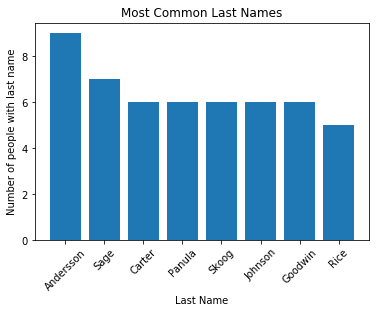

In [38]:
%matplotlib inline
plt.bar(most_common_ln.index,most_common_ln)
plt.title('Most Common Last Names')
plt.ylabel('Number of people with last name')
plt.xlabel('Last Name')
plt.xticks(rotation=45)
plt.show()

Now let's visualize:

In [ ]:
# Plot a bar graph of the most common last names


### Who Paid the Most Fare?

As always - a few ways we can do this: `.loc` versus `sort_values`

In [41]:
df.loc[df['Fare'] == df['Fare'].max()]

#who paid the most

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer


In [44]:
df.sort_values(by='Fare',ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune


And let's visualize some more!

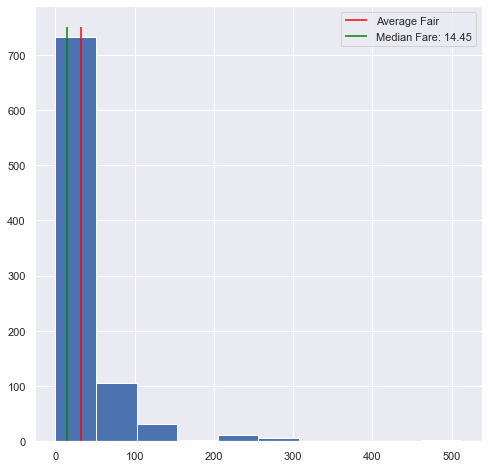

In [60]:
# Plot a histogram - but now, let's do all fares
plt.figure(figsize = (8,8))
plt.hist(df['Fare'],bins=10)
plt.vlines(df['Fare'].mean(),0,750, label = 'Average Fair', color = 'red')
plt.vlines(df['Fare'].median(),0,750, label = f"Median Fare: {df['Fare'].median():.2f}", color = 'green')
plt.legend()
plt.show()
#ignoring nulls 

In [ ]:
# Okay that's pretty bland, let's see if we can add more detail


## Seaborn 

![Sam Seaborn from West Wing, image from the TV guide](https://tvguide1.cbsistatic.com/i/2017/01/07/0f1a6ab5-8c63-4869-9f85-5d8b2b14913b/cf2e9396152ee85468e5bcfe063053a4/010717-west-wing-rob-lowe-news.jpg)

[Seaborn, I choose you!](https://elitedatascience.com/python-seaborn-tutorial) (aka an excellent exploration of the functionality of Seaborn)

Now let's practice with Seaborn:

In [67]:
import seaborn as sns
sns.set(style='darkgrid')
# Same as sns.set_style('darkgrid')
#does for whole notebook - so you can go back and refresh the charts with new style

NameError: name 'ser_test' is not defined

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

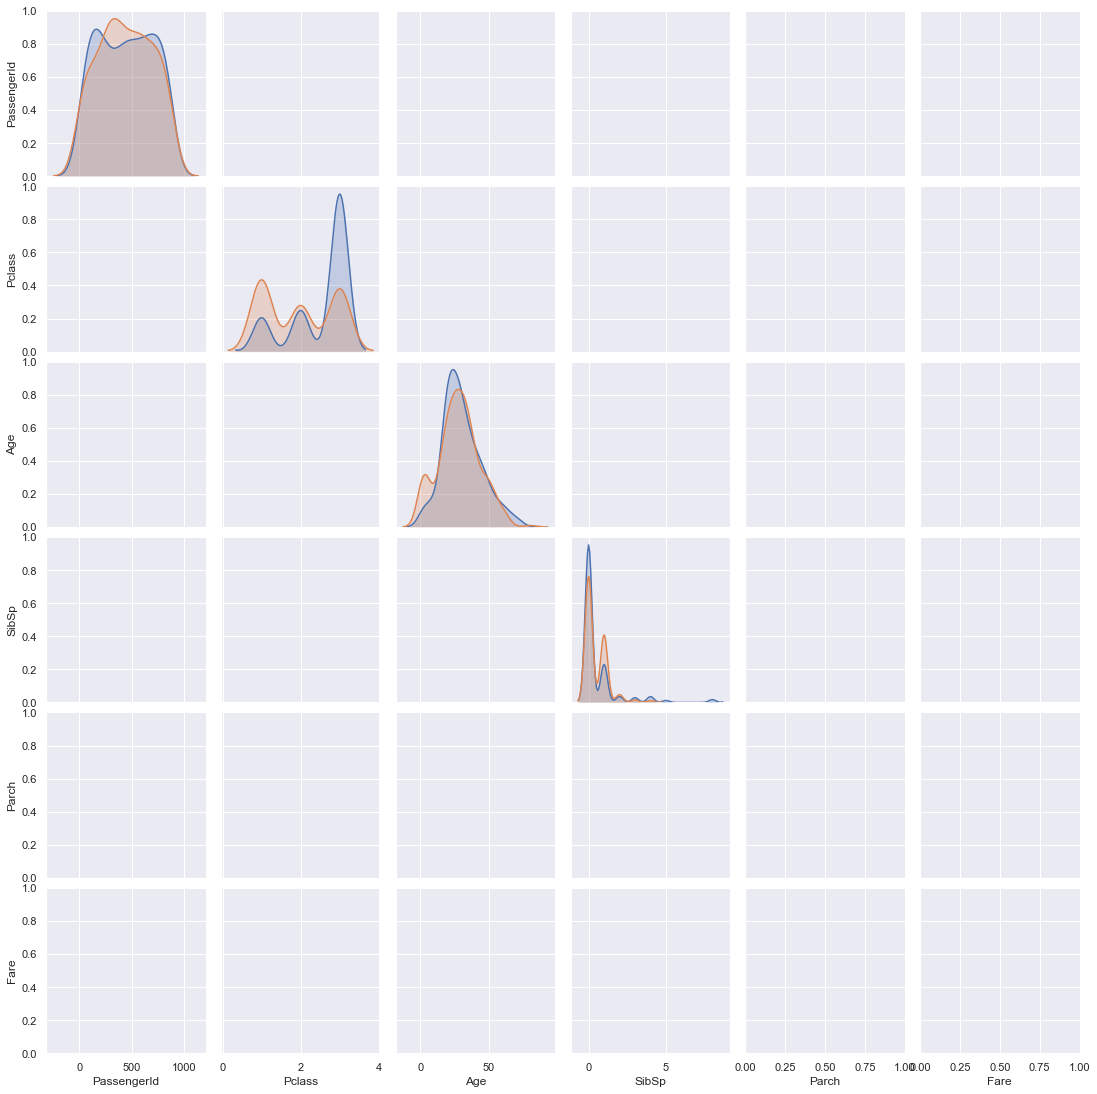

In [70]:
# We've mentioned pairplots, let's take a look...
sns.pairplot(df, hue = 'Survived')
#trying to predict whether someone survived
#only works on things it already recognizes as numeric


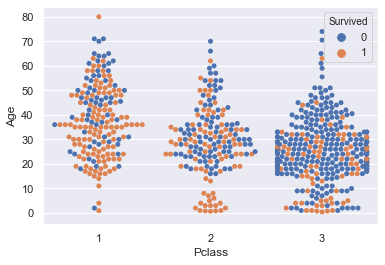

In [63]:
# Try out a swarm plot with class and age
sns.swarmplot('Pclass','Age', data = df, hue='Survived')

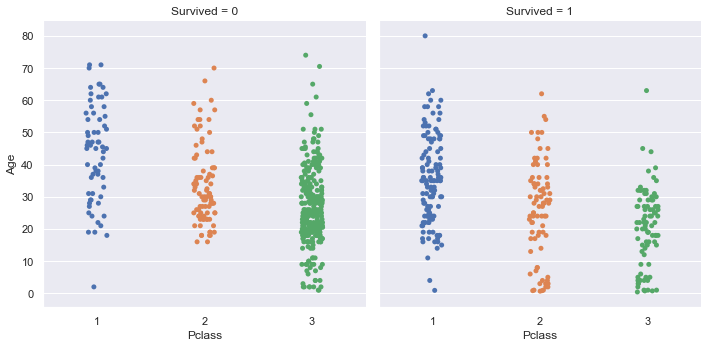

In [66]:
# Let's try a categorical plot (used to be a factor plot)
# Do the same swarmplot, but now make columns of survived
sns.catplot('Pclass','Age', data=df, col='Survived')

In [71]:
sns.__version__

'0.10.0'

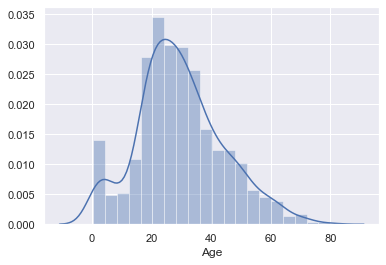

In [72]:
sns.distplot(df['Age'].dropna())